# Exploratory Data Analysis on 2020 CDC Heart Disease Data

Before dive into the machine learning part on this dataset, we first do some exploratory data analysis to gain some understanding of the data. 

Originally, the dataset comes from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents.The most recent dataset (as of February 15, 2022) includes data from 2020. The vast majority of columns are key indicators of heart disease, such as obesity (high BMI), diabetic status, drinking too much alcohol, etc.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv("https://raw.githubusercontent.com/YulinLi98/Sample_Repo/main/heart_2020.csv")
df.head() #shows the first 5 rows of the dataset

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.shape #size of the dataset

(319795, 18)

In [18]:
missing_cnt = df.isnull().sum()
print(missing_cnt)

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


There is no missing value.

## Qualitative variables analysis

Since the dataset specially examines heart disease status, so we start by graphing counts for those who have heart disease those who not have.

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

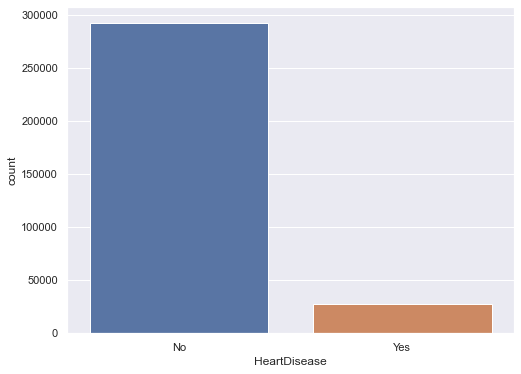

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(x = "HeartDisease", data = df)

In [27]:
cnt_have_disease = len(df[df['HeartDisease']=='Yes'])
print(f'Percentage of people having heart disease: {round(cnt_have_disease/len(df),2)}')

Percentage of people having heart disease: 0.09


The ratio of people who have heart disease to those who do not have is about 1:10. Therefore, the dataset is imbalanced.

<AxesSubplot:xlabel='Smoking', ylabel='Percentage'>

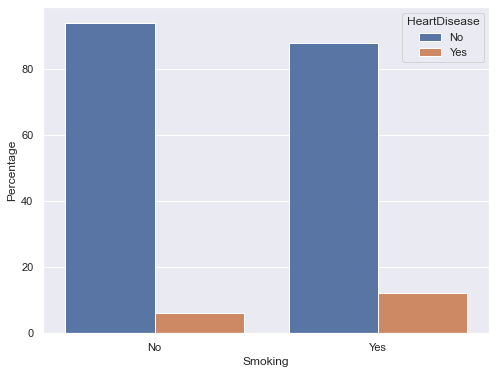

In [69]:
#HeartDisease by Smoking
df_perc = df.groupby('Smoking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Smoking')

plt.subplots(figsize=(8,6))
sns.barplot(x='Smoking', y='Percentage', hue='HeartDisease', data=df_perc)

The above graph shows that people with smoking habit have higher percentage of having heart disease.

<AxesSubplot:xlabel='AlcoholDrinking', ylabel='Percentage'>

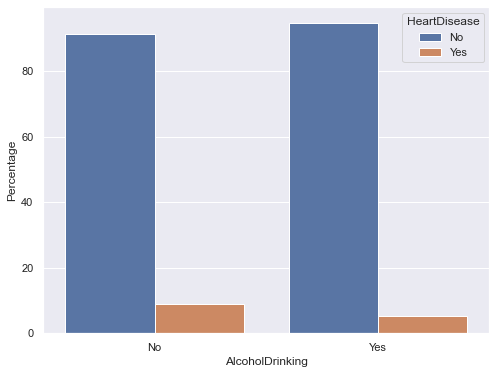

In [70]:
#HeartDisease by AlcoholDrinking
df_perc = df.groupby('AlcoholDrinking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('AlcoholDrinking')

plt.subplots(figsize=(8,6))
sns.barplot(x='AlcoholDrinking', y='Percentage', hue='HeartDisease', data=df_perc)

Surprisingly, the above graph shows that people with drinking habit have lower percentage of having heart disease.

<AxesSubplot:xlabel='Stroke', ylabel='Percentage'>

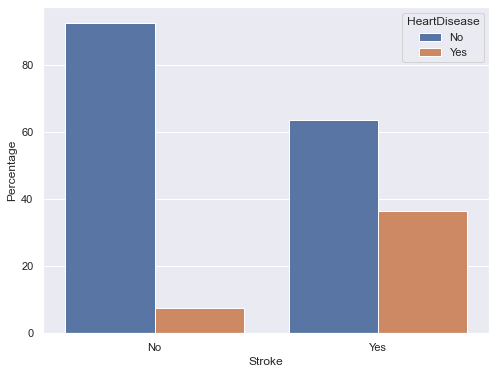

In [71]:
#HeartDisease by Stroke Status
df_perc = df.groupby('Stroke')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Stroke')

plt.subplots(figsize=(8,6))
sns.barplot(x='Stroke', y='Percentage', hue='HeartDisease', data=df_perc)

There is a huge difference between people who had and hadn’t had a Stroke, demonstrating that this variable is an important factor for indicating if a person has heart disease.

<AxesSubplot:xlabel='DiffWalking', ylabel='Percentage'>

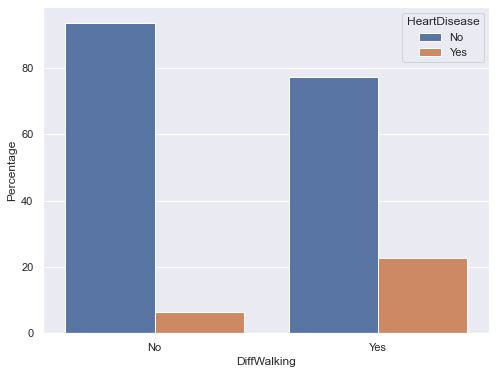

In [74]:
#Diffculty walking
df_perc = df.groupby('DiffWalking')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('DiffWalking')

plt.subplots(figsize=(8,6))
sns.barplot(x='DiffWalking', y='Percentage', hue='HeartDisease', data=df_perc)

As happened with the variable "Stroke", the difficulty of walking is a relevant factor that contributes to a heart disease condition.

<AxesSubplot:xlabel='Sex', ylabel='Percentage'>

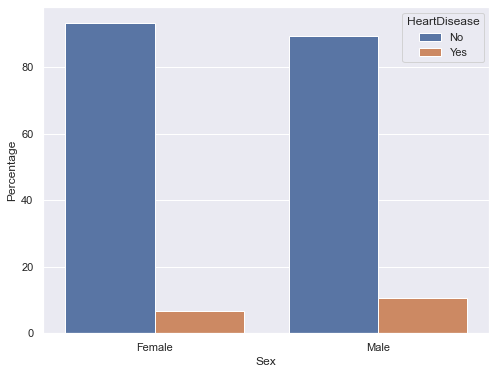

In [75]:
#HeartDisease by Sex
df_perc = df.groupby('Sex')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Sex')

plt.subplots(figsize=(8,6))
sns.barplot(x='Sex', y='Percentage', hue='HeartDisease', data=df_perc)

The above plot shows that men have higher chance of having heart disease.

<AxesSubplot:xlabel='AgeCategory', ylabel='Percentage'>

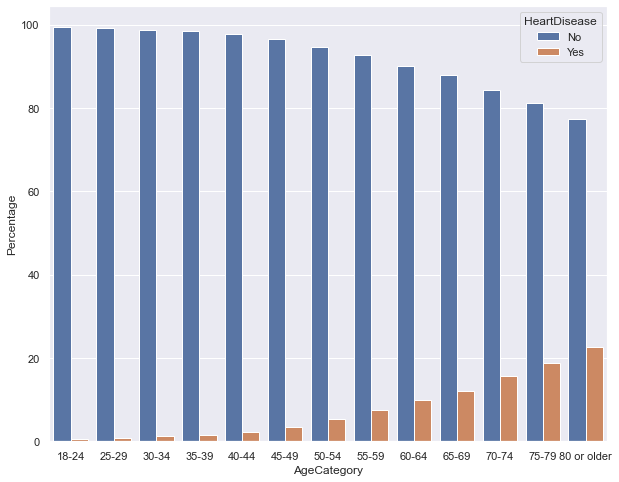

In [77]:
#HeartDisease by Age
df_perc = df.groupby('AgeCategory')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('AgeCategory')

plt.subplots(figsize=(10,8))
sns.barplot(x='AgeCategory', y='Percentage', hue='HeartDisease', data=df_perc)

The above plot shows that as the person grows older, the higher the chance for having heart disease. The graph also shows a perceptible exponential growth for the prospective of having heart disease.

<AxesSubplot:xlabel='Race', ylabel='Percentage'>

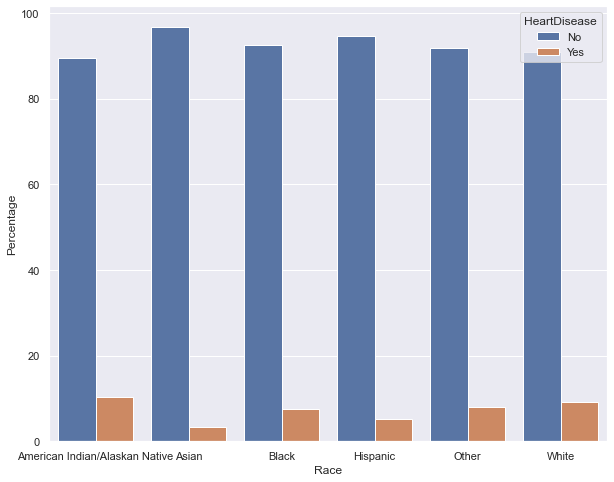

In [78]:
#HeartDisease by Race
df_perc = df.groupby('Race')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Race')

plt.subplots(figsize=(10,8))
sns.barplot(x='Race', y='Percentage', hue='HeartDisease', data=df_perc)

From the plot, we can see that there is no significance different in between each race. Asian people seem to be less susceptible for having heart disease in comparison with other categories. In contrast, American Indian/Alaskan has a considerable tendency of heart disease.

<AxesSubplot:xlabel='Diabetic', ylabel='Percentage'>

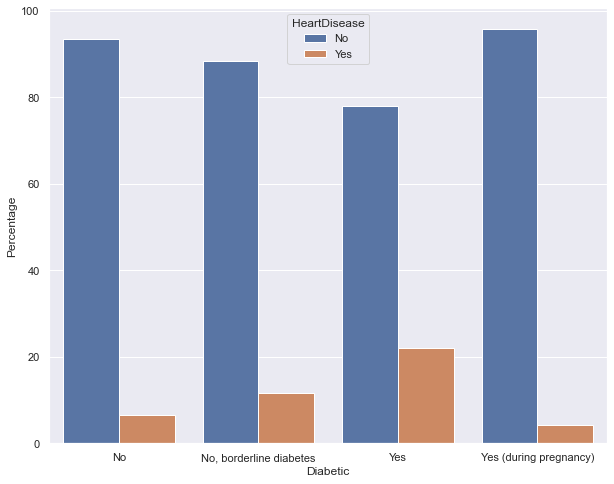

In [79]:
#Diabetes
df_perc = df.groupby('Diabetic')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Diabetic')

plt.subplots(figsize=(10,8))
sns.barplot(x='Diabetic', y='Percentage', hue='HeartDisease', data=df_perc)

Diabetes seems to be a relevant factor for the prevalence of having heart disease, with borderline diabetes having an intermediate pattern between having and not having diabetes. Gestational diabetes doesn't seem to be a risk factor compared with other types of diabetes.

<AxesSubplot:xlabel='PhysicalActivity', ylabel='Percentage'>

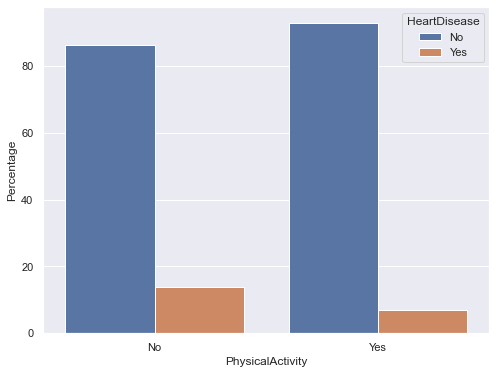

In [81]:
#Physical Activity
df_perc = df.groupby('PhysicalActivity')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('PhysicalActivity')

plt.subplots(figsize=(8,6))
sns.barplot(x='PhysicalActivity', y='Percentage', hue='HeartDisease', data=df_perc)

People with less Physical Activity tend to be more propitious to acquire heart disease.

<AxesSubplot:xlabel='GenHealth', ylabel='Percentage'>

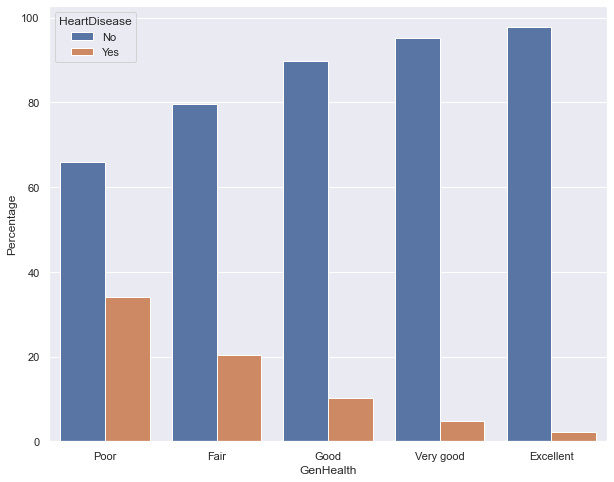

In [83]:
#General Health
df_perc = df.groupby('GenHealth')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('GenHealth')

plt.subplots(figsize=(10,8))
order = ['Poor', 'Fair', 'Good', 'Very good', 'Excellent']
sns.barplot(x='GenHealth', y='Percentage', hue='HeartDisease', data=df_perc, order=order)

The graph above shows that a better health condition minimizes the chance of a person acquiring heart disease.

<AxesSubplot:xlabel='Asthma', ylabel='Percentage'>

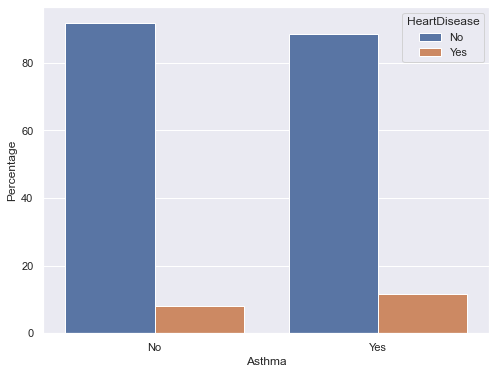

In [84]:
#Asthma
df_perc = df.groupby('Asthma')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('Asthma')

plt.subplots(figsize=(8,6))
sns.barplot(x='Asthma', y='Percentage', hue='HeartDisease', data=df_perc)

People with Asthma tend to be more susceptible to getting heart disease.

<AxesSubplot:xlabel='KidneyDisease', ylabel='Percentage'>

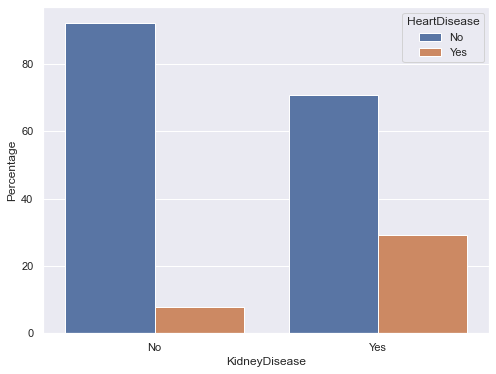

In [85]:
#KidneyDisease	
df_perc = df.groupby('KidneyDisease')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('KidneyDisease')

plt.subplots(figsize=(8,6))
sns.barplot(x='KidneyDisease', y='Percentage', hue='HeartDisease', data=df_perc)

According to the graph above, Kidney Disease seems to be a major factor in getting heart disease.

<AxesSubplot:xlabel='SkinCancer', ylabel='Percentage'>

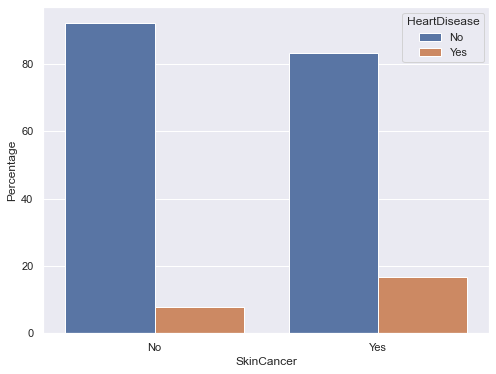

In [86]:
#SkinCancer	
df_perc = df.groupby('SkinCancer')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('SkinCancer')

plt.subplots(figsize=(8,6))
sns.barplot(x='SkinCancer', y='Percentage', hue='HeartDisease', data=df_perc)

Skin Cancer also seems to be a relevant factor for a person acquiring heart disease.

## Quantitative variables analysis 
Now the analysis will concentrate on quantitative variables.

Text(0.5, 1.0, 'Distribution of BMI by Heart Disease Status')

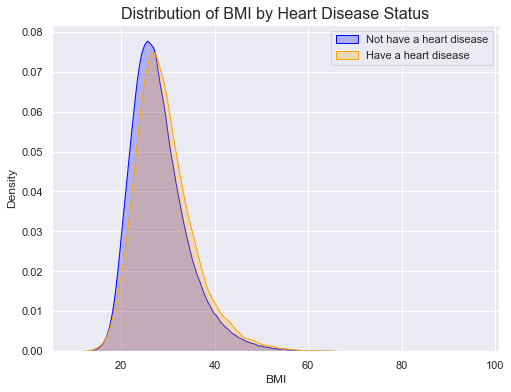

In [3]:
#Distribution of BMI
plt.figure(figsize=(8,6))
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'No'],
                color="Blue", shade = True)
ax = sns.kdeplot(df.BMI[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('BMI')
ax.set_title("Distribution of BMI by Heart Disease Status", fontsize = 16)

We can see that the distributions of BMI for people having heart disease and not having heart disease are almost superposition. Both distributions are slightly right-skewed. The mean of BMI for those not having heart disease is less than the mean of having heart disease.

Text(0.5, 1.0, 'Distribution of Sleeptime by Heart Disease Status')

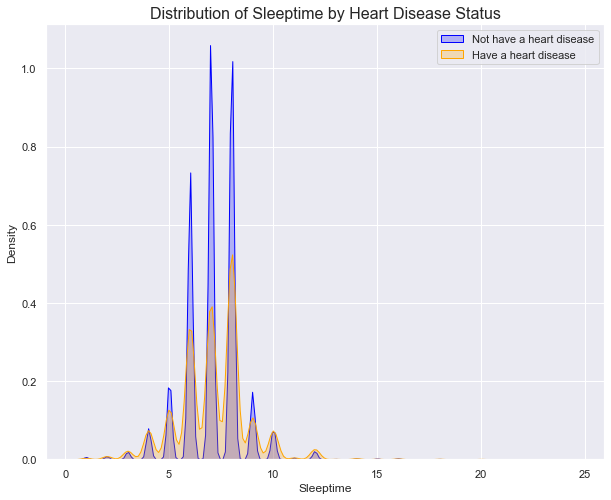

In [4]:
#Distirbution of Sleeptime by HeartDisease Status
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.SleepTime[df["HeartDisease"] == 'No'],
                color="Blue", shade = True)
ax = sns.kdeplot(df.SleepTime[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Orange", shade= True)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Sleeptime')
ax.set_title("Distribution of Sleeptime by Heart Disease Status", fontsize = 16)

Text(0.5, 1.0, 'People without Heart Disease')

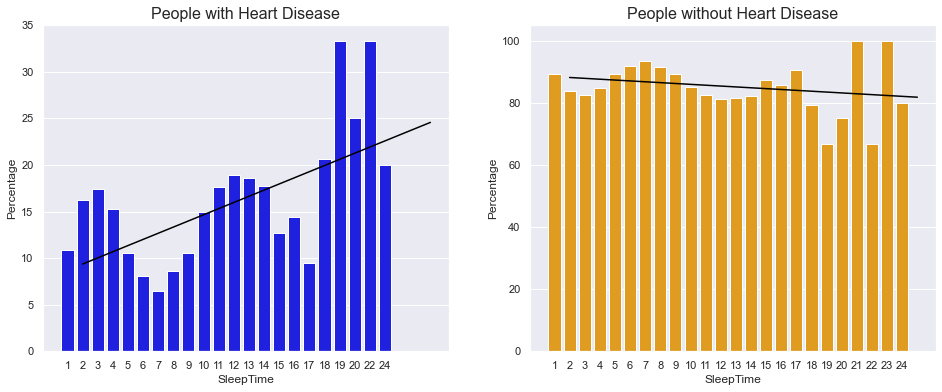

In [113]:
from sklearn.linear_model import Ridge

df_perc = df.groupby('SleepTime')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('SleepTime')
df_perc_y = df_perc[df_perc['HeartDisease'] == 'Yes'].astype({'SleepTime':int})
df_perc_n = df_perc[df_perc['HeartDisease'] == 'No'].astype({'SleepTime':int})

#Linear Regression
lr = Ridge()

fig,ax = plt.subplots(figsize=(16,6))

# First Regression
ax = plt.subplot(1,2,1)
lr.fit(df_perc_y[['SleepTime']], df_perc_y[['Percentage']])
sns.barplot(x='SleepTime', y='Percentage', data=df_perc_y, ax=ax, color='blue')
plt.plot(df_perc_y[['SleepTime']], lr.predict(df_perc_y[['SleepTime']]), color='black')
plt.title('People with Heart Disease', fontsize=16)

# Second Regression
ax = plt.subplot(1,2,2)
lr.fit(df_perc_n[['SleepTime']], df_perc_n[['Percentage']])
sns.barplot(x='SleepTime', y='Percentage', data=df_perc_n, ax=ax, color='orange')
plt.plot(df_perc_n[['SleepTime']], lr.predict(df_perc_n[['SleepTime']]), color='black')
plt.title('People without Heart Disease', fontsize=16)

The Analysis of the values of both people with and without heart disease shows a slightly positive trend of people having heart disease to sleep for more hours. However, the difference might not be evident enough to produce an apparent correlation.

Text(0.5, 1.0, 'Distribution of PhysicalHealth by Heart Disease Status')

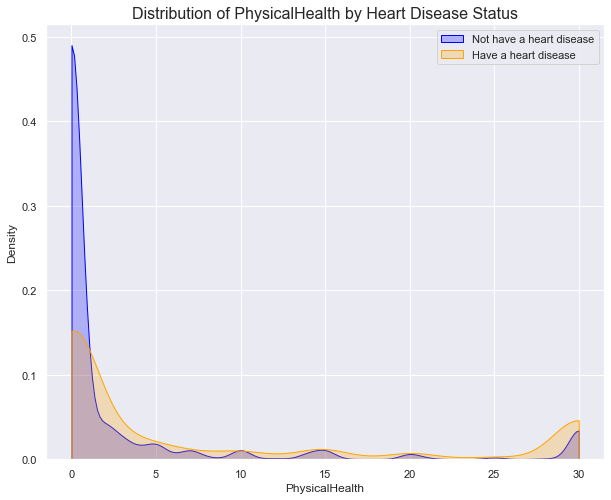

In [5]:
#Physical Health
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.PhysicalHealth[df["HeartDisease"] == 'No'],
                color="Blue", shade = True, cut = 0)
ax = sns.kdeplot(df.PhysicalHealth[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Orange", shade= True, cut = 0)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('PhysicalHealth')
ax.set_title("Distribution of PhysicalHealth by Heart Disease Status", fontsize = 16)

The distirbution plot demonstrates that people without heart disease tend to be less likely to have physical health problems.

Text(0.5, 1.0, 'People without Heart Disease')

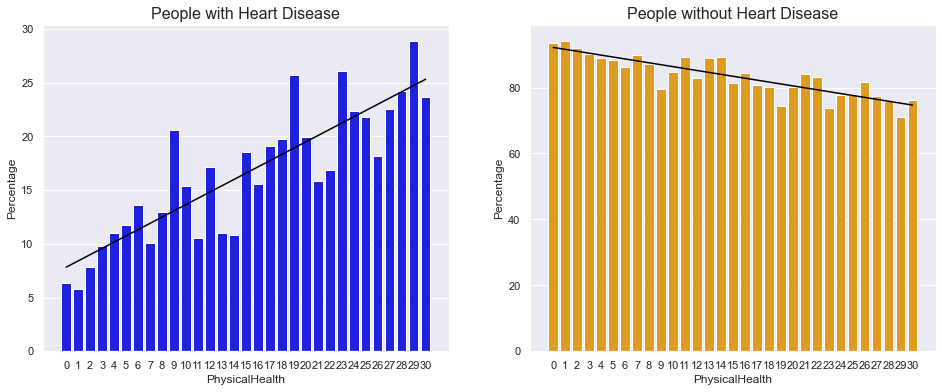

In [117]:
df_perc = df.groupby('PhysicalHealth')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('PhysicalHealth')
df_perc_y = df_perc[df_perc['HeartDisease'] == 'Yes'].astype({'PhysicalHealth':int})
df_perc_n = df_perc[df_perc['HeartDisease'] == 'No'].astype({'PhysicalHealth':int})

#Linear Regression
lr = Ridge()

fig,ax = plt.subplots(figsize=(16,6))

# First Regression
ax = plt.subplot(1,2,1)
lr.fit(df_perc_y[['PhysicalHealth']], df_perc_y[['Percentage']])
sns.barplot(x='PhysicalHealth', y='Percentage', data=df_perc_y, ax=ax, color='blue')
plt.plot(df_perc_y[['PhysicalHealth']], lr.predict(df_perc_y[['PhysicalHealth']]), color='black')
plt.title('People with Heart Disease', fontsize=16)

# Second Regression
ax = plt.subplot(1,2,2)
lr.fit(df_perc_n[['PhysicalHealth']], df_perc_n[['Percentage']])
sns.barplot(x='PhysicalHealth', y='Percentage', data=df_perc_n, ax=ax, color='orange')
plt.plot(df_perc_n[['PhysicalHealth']], lr.predict(df_perc_n[['PhysicalHealth']]), color='black')
plt.title('People without Heart Disease', fontsize=16)

The bar plots show a clear correlation between physical health problems and heart disease.

Text(0.5, 1.0, 'Distribution of PhysicalHealth by Heart Disease Status')

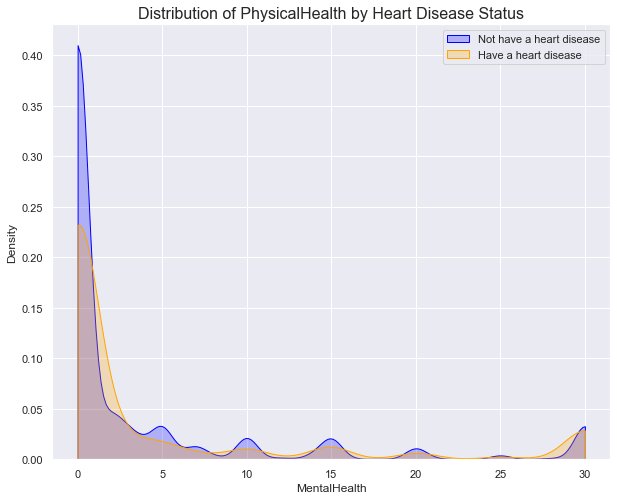

In [6]:
#Mental Health
plt.figure(figsize=(10,8))
ax = sns.kdeplot(df.MentalHealth[df["HeartDisease"] == 'No'],
                color="Blue", shade = True, cut = 0)
ax = sns.kdeplot(df.MentalHealth[df["HeartDisease"] == 'Yes'],
                ax =ax, color="Orange", shade= True, cut = 0)
ax.legend(["Not have a heart disease","Have a heart disease"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('MentalHealth')
ax.set_title("Distribution of PhysicalHealth by Heart Disease Status", fontsize = 16)

Text(0.5, 1.0, 'People without Heart Disease')

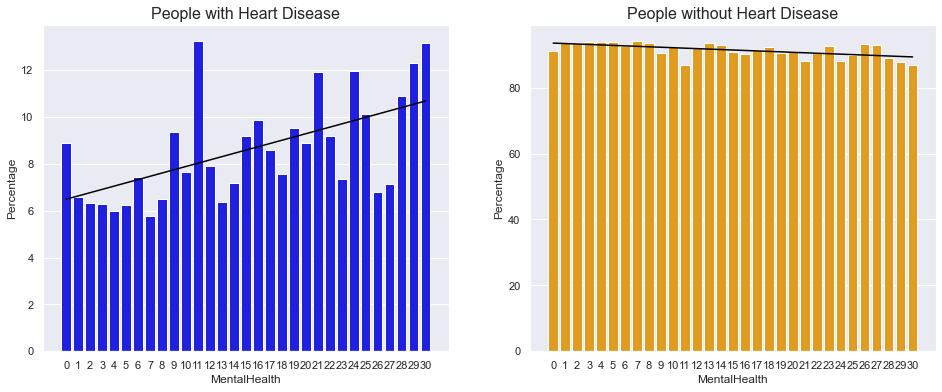

In [119]:
df_perc = df.groupby('MentalHealth')['HeartDisease'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('MentalHealth')
df_perc_y = df_perc[df_perc['HeartDisease'] == 'Yes'].astype({'MentalHealth':int})
df_perc_n = df_perc[df_perc['HeartDisease'] == 'No'].astype({'MentalHealth':int})

#Linear Regression
lr = Ridge()

fig,ax = plt.subplots(figsize=(16,6))

# First Regression
ax = plt.subplot(1,2,1)
lr.fit(df_perc_y[['MentalHealth']], df_perc_y[['Percentage']])
sns.barplot(x='MentalHealth', y='Percentage', data=df_perc_y, ax=ax, color='blue')
plt.plot(df_perc_y[['MentalHealth']], lr.predict(df_perc_y[['MentalHealth']]), color='black')
plt.title('People with Heart Disease', fontsize=16)

# Second Regression
ax = plt.subplot(1,2,2)
lr.fit(df_perc_n[['MentalHealth']], df_perc_n[['Percentage']])
sns.barplot(x='MentalHealth', y='Percentage', data=df_perc_n, ax=ax, color='orange')
plt.plot(df_perc_n[['MentalHealth']], lr.predict(df_perc_n[['MentalHealth']]), color='black')
plt.title('People without Heart Disease', fontsize=16)

The bar plots show a slight correlation between Mental Health problems and Heart Disease.

## Check for Correlation

In order to check for correlation, we will change some of the catogorical variables into numerical variables by replacing the Yes/No, Male/Female with 1/0. For the 'Diabetic', we will also replace 'No, borderline diabetes' with 0 and 'Yes (during pregnancy)' with 1. 

<AxesSubplot:>

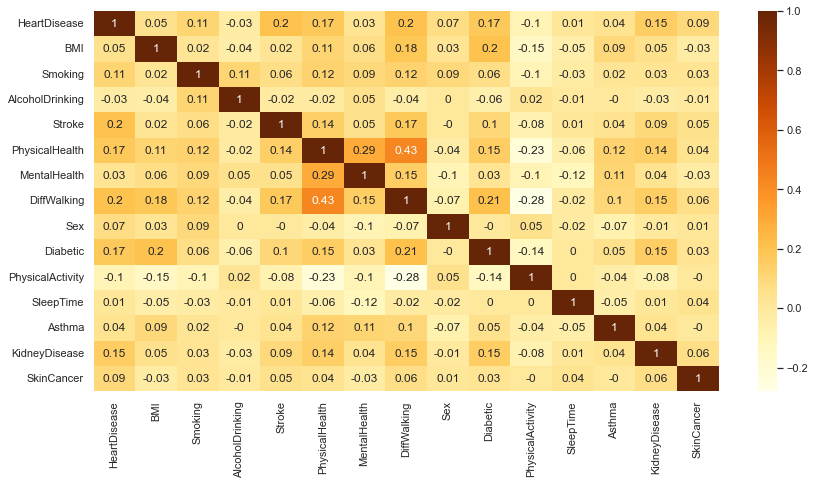

In [122]:
df_replace =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':0,'Yes (during pregnancy)':1})

correlation = df_replace.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

THis heatmap does not show any significant colinearality. We can see that 'PhysicalHealth' is correlated with 'DiffWalking'.